In [2]:
import torch
from torch import nn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

torch.__version__

'2.8.0'

In [ ]:
# creating a dataset
weights = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = X * weights + bias


In [7]:
X[:5], y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.7000],
         [0.7060],
         [0.7120],
         [0.7180],
         [0.7240]]))

In [8]:
len(X), len(y)

(50, 50)

In [9]:
# train test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [33]:
# visulize the dataset by creating a function

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10, 7))
    # plotting the tran data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    # plotting the test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Test data")
    if predictions != None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.legend(prop={"size": 14});




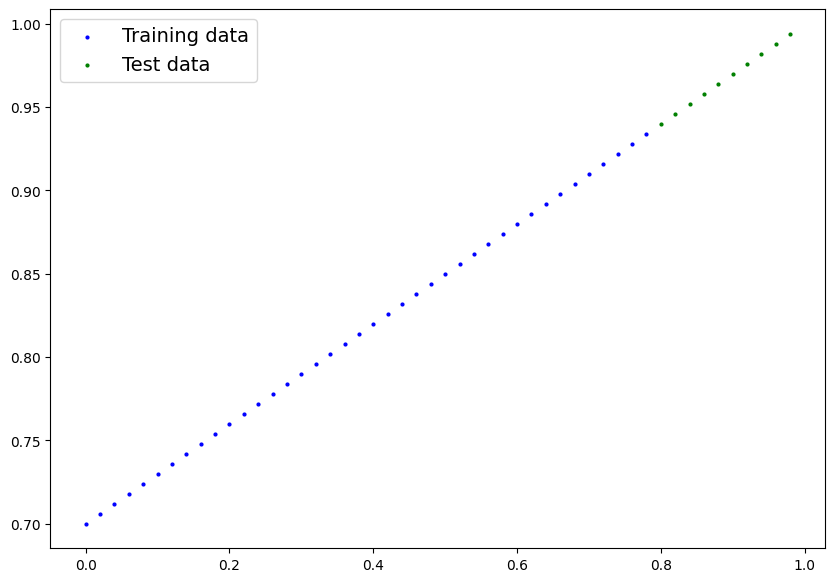

In [34]:
plot_predictions()

In [23]:
# creating a linear regression model

class LinearRegresionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,
                                               requires_grad=True,
                                               dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
    def forward(self, x):
            return self.weight * x + self.bias
            

In [24]:
model_0 = LinearRegresionModel()
model_0

LinearRegresionModel()

In [25]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

Checking the contents of the pytorch model

In [26]:
# create a random seed
torch.manual_seed(42)

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [27]:
weights, bias

(0.3, 0.7)

In [21]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.9400],
         [0.9460],
         [0.9520],
         [0.9580],
         [0.9640],
         [0.9700],
         [0.9760],
         [0.9820],
         [0.9880],
         [0.9940]]))

In [28]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [29]:
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [31]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

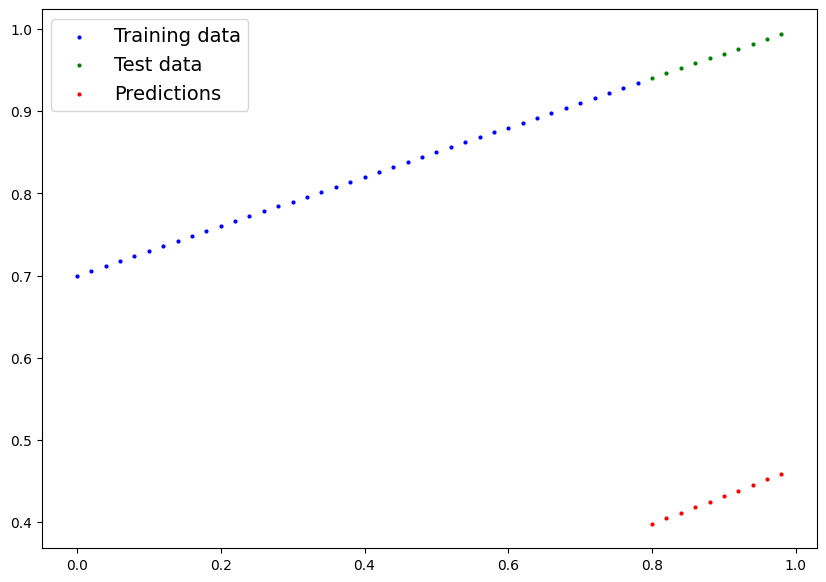

In [35]:
plot_predictions(predictions=y_preds)

In [36]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [37]:
# setup a loss function
loss_fn = nn.L1Loss()

# setup an optimizer (sctchastc gradient decent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [38]:
torch.manual_seed(42)
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

# Training

# 0. Loop through the data
for epoch in range(epochs):
    model_0.train()

    # 1. forward pass
    y_pred = model_0(X_train)
    # 1. calculate the loss
    loss = loss_fn(y_pred, y_train)
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    # 4. backpropagation
    loss.backward()
    # 5. Optimizer step (gradient decsent)
    optimizer.step()

    # Testing
    model_0.state_dict()
    model_0.eval()
    with torch.inference_mode():
        # 1. forward pass
        test_pred = model_0(X_test)
        # 2. calculate the loss
        test_loss = loss_fn(test_pred, y_test)
    # print out what's happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss.item())
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
        print(model_0.state_dict())


Epoch: 0 | Loss: 0.556881308555603 | Test loss: 0.5250651240348816
OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.44167131185531616 | Test loss: 0.3903551697731018
OrderedDict([('weight', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.32646140456199646 | Test loss: 0.2556453347206116
OrderedDict([('weight', tensor([0.4186])), ('bias', tensor([0.3388]))])
Epoch: 30 | Loss: 0.21125152707099915 | Test loss: 0.12093551456928253
OrderedDict([('weight', tensor([0.4576])), ('bias', tensor([0.4388]))])
Epoch: 40 | Loss: 0.09604163467884064 | Test loss: 0.014558088965713978
OrderedDict([('weight', tensor([0.4966])), ('bias', tensor([0.5388]))])
Epoch: 50 | Loss: 0.04522073268890381 | Test loss: 0.08176179975271225
OrderedDict([('weight', tensor([0.5073])), ('bias', tensor([0.5973]))])
Epoch: 60 | Loss: 0.03982054069638252 | Test loss: 0.08882363885641098
OrderedDict([('weight', tensor([0.4950])), ('bias', tensor([0.6153]))])
Epoc